In [1]:
from skimage.io import imread, imsave, imshow
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from skimage import exposure

base_dir = 'res/'

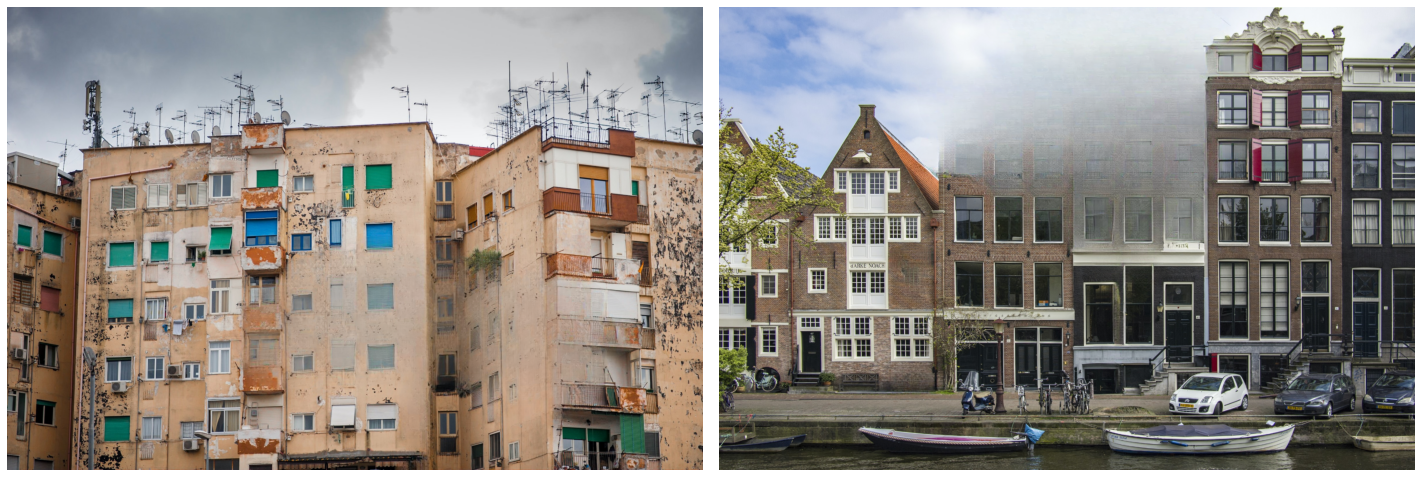

In [72]:
good = imread(base_dir + 'wall_inpainted.png')
bad = imread(base_dir + 'bad_reconstruction.png')


bad = resize(bad, (good.shape[0], good.shape[1]))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(good)
ax[0].axis('off')
ax[1].imshow(bad)
ax[1].axis('off')
plt.tight_layout()
plt.show()


In [78]:
def plot_imgs(origin, mask, inpainted):
    fig, axes = plt.subplots(1, 3, figsize=(20, 9))
    axes[0].imshow(origin)
    axes[0].set_title('Origin')
    # axes[0].axis('off')
    axes[1].imshow(mask)
    axes[1].set_title('Mask')
    # axes[1].axis('off')
    axes[2].imshow(inpainted)
    axes[2].set_title('Inpainted')
    # axes[2].axis('off')
    plt.tight_layout()
    plt.show()

In [79]:
brick_origin = imread(base_dir + 'brick_origin.png')
brick_mask = imread(base_dir + 'brick_mask.png')
brick_inpainted = imread(base_dir + 'brick_inpainted.png')
# wall_origin = imread(base_dir + 'wall_origin.png')
# wall_mask = imread(base_dir + 'wall_mask.png')
# wall_inpainted = imread(base_dir + 'wall_inpainted.png')

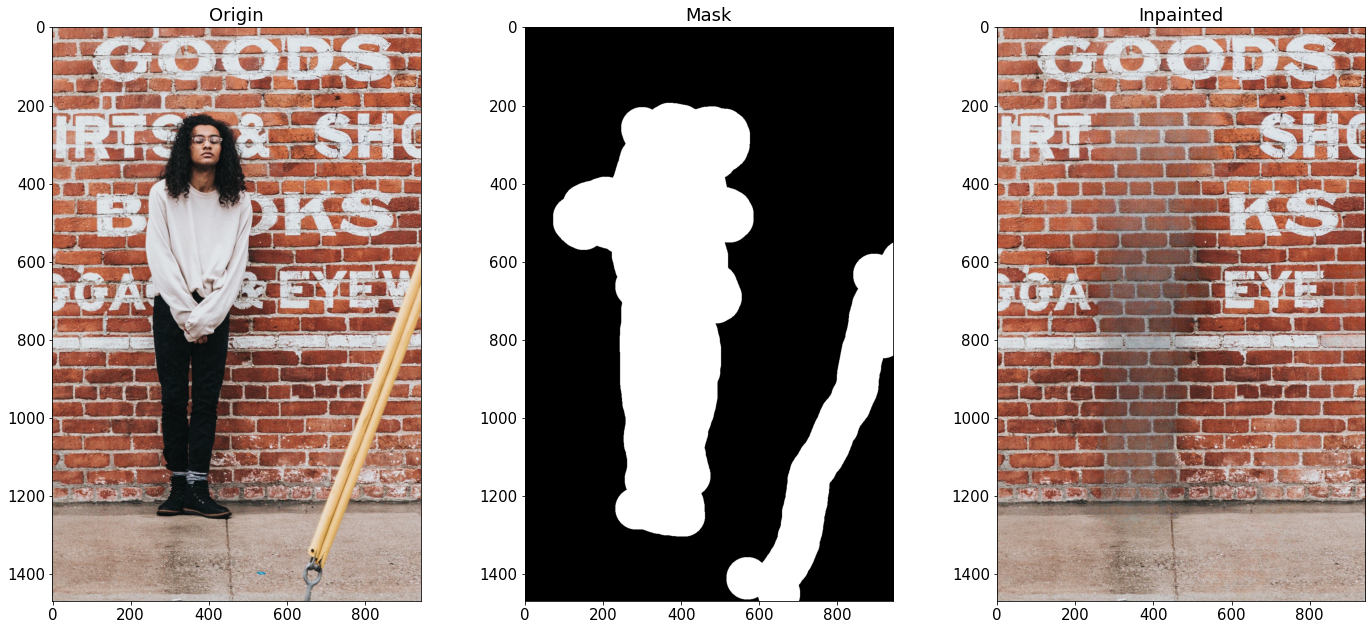

In [80]:
plot_imgs(brick_origin, brick_mask, brick_inpainted)

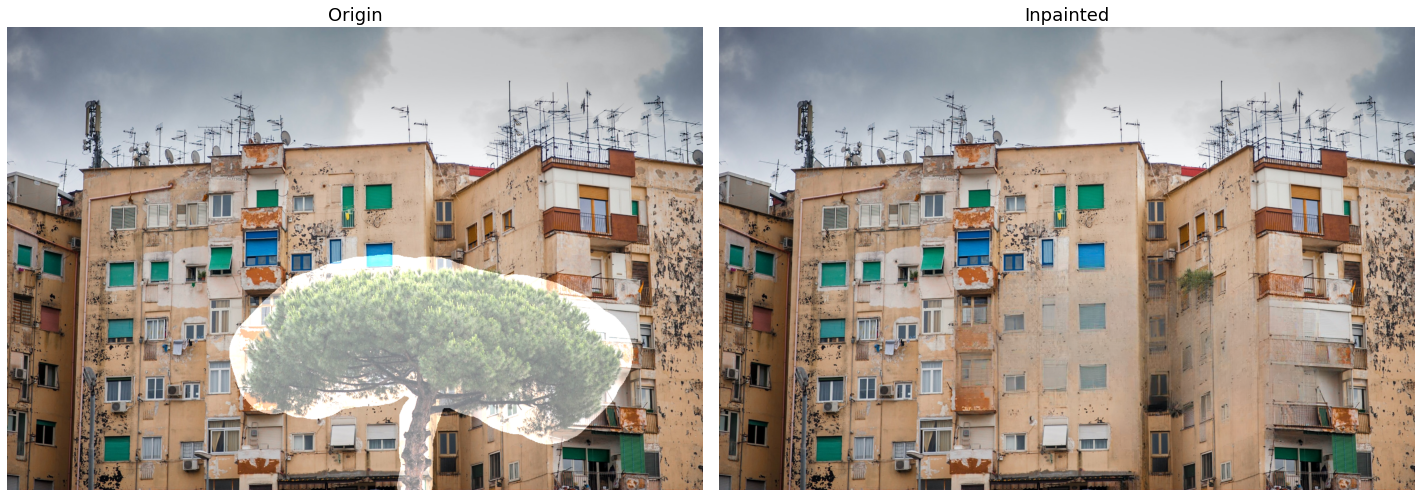

In [51]:
wall_origin_with_mask = imread(base_dir + 'origin_with_mask.png')

fig, ax = plt.subplots(1, 2, figsize=(20, 9))
# Change font size
plt.rcParams.update({'font.size': 15})
ax[0].imshow(wall_origin_with_mask)
ax[0].set_title('Origin')
ax[0].axis('off')
ax[1].imshow(wall_inpainted)
ax[1].set_title('Inpainted')
ax[1].axis('off')
plt.tight_layout()
plt.show()

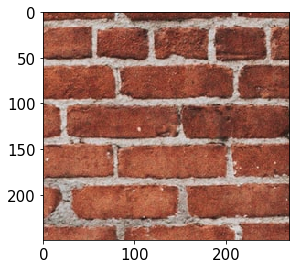

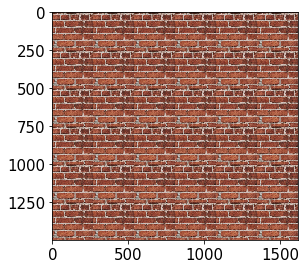

In [88]:
# ref = wall_origin[300:900,170:530,:]
# plt.figure(figsize=(10,15))
# # plt.title('Reference image')
# plt.axis('off')
# imshow(ref)
# print(ref.shape)
# imsave(base_dir + 'wall_ref.png', ref)

ref = brick_origin[900:1150,0:270]
imshow(ref)
plt.show()
n_rep = 6
new_ref = np.zeros((n_rep*ref.shape[0], n_rep*ref.shape[1], 3)).astype(np.uint8)
for i in range(n_rep):
    for j in range(n_rep):
        new_ref[i*ref.shape[0]:(i+1)*ref.shape[0], j*ref.shape[1]:(j+1)*ref.shape[1], :] = ref
imshow(new_ref)
plt.show()
ref = new_ref
imsave(base_dir + 'brick_ref.png', ref)

In [ ]:
plt.plot()

In [94]:
brick_extracted_mask = brick_mask[160:1320,50:601]
torecolor = brick_inpainted[160:1320,50:601]
brick_ref = ref[160:1320,50:601]
imsave(base_dir + 'brick_extracted_mask.png', brick_extracted_mask)
imsave(base_dir + 'brick_torecolor.png', torecolor)
imsave(base_dir + 'brick_ref.png', brick_ref)

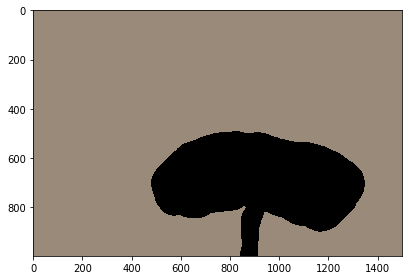

In [6]:
mean_color = ref.mean(axis=0).mean(axis=0)
mean_img = np.ones(wall_origin.shape, dtype=np.uint8) * mean_color.astype(np.uint8)*(1-wall_mask//255)
imshow(mean_img/255)

(998, 1499, 3)


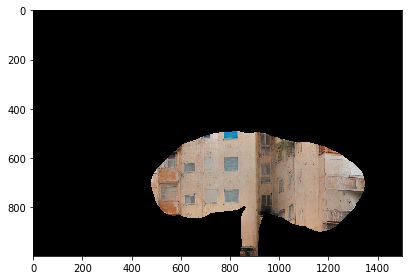

In [7]:
inpainted_mask = (wall_mask//255 * wall_inpainted)
imshow(inpainted_mask)
print(inpainted_mask.shape)

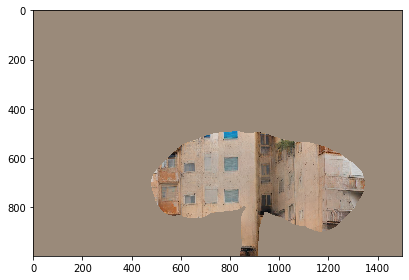

In [8]:
inpainted_mask = mean_img + inpainted_mask
imshow(inpainted_mask)

(508, 920, 3)


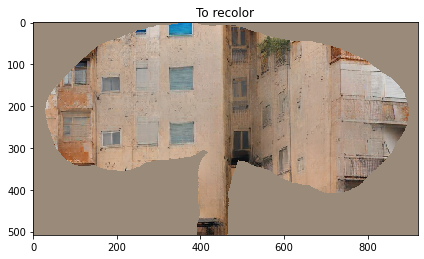

In [9]:
torecolor = inpainted_mask[490:,450:1370,:]
plt.title('To recolor')
imshow(torecolor)
print(torecolor.shape)
imsave(base_dir + 'wall_torecolor.png', torecolor)

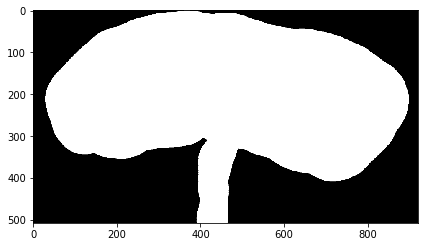

In [10]:
mask_extraced = wall_mask[490:,450:1370,:]
imshow(mask_extraced)

In [16]:
def apply_result_to_image(result, mask, origin):
    res = imread(result)
    mask_extraced = mask[490:,450:1370,:]
    res_mask = resize(res, mask_extraced.shape) * (mask_extraced//255)
    wall_with_mask = (origin * (1-mask//255))
    wall_with_mask[490:,450:1370,:] += (res_mask*255).astype(np.uint8)
    return wall_with_mask

## Variation of $\lambda_L$

In [24]:
wall_with_mask_L001 = apply_result_to_image('resultat_L001.png', wall_mask, wall_origin)
wall_with_mask_L01 = apply_result_to_image('resultat_L01.png', wall_mask, wall_origin)
wall_with_mask_L1 = apply_result_to_image('resultat_L1.png', wall_mask, wall_origin)
wall_with_mask_L10 = apply_result_to_image('resultat_L10.png', wall_mask, wall_origin)
wall_with_mask_L100 = apply_result_to_image('resultat_L100.png', wall_mask, wall_origin)

wall_with_mask_L_list = [wall_with_mask_L001, wall_with_mask_L01, wall_with_mask_L1, wall_with_mask_L10, wall_with_mask_L100]

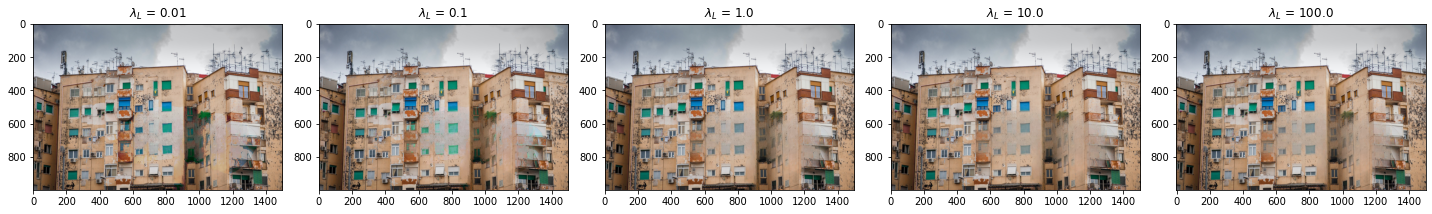

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(wall_with_mask_L_list[i])
    axes[i].set_title(fr'$\lambda_L$ = {0.01*10**i}')
plt.tight_layout()

## Variation of $\lambda_R$

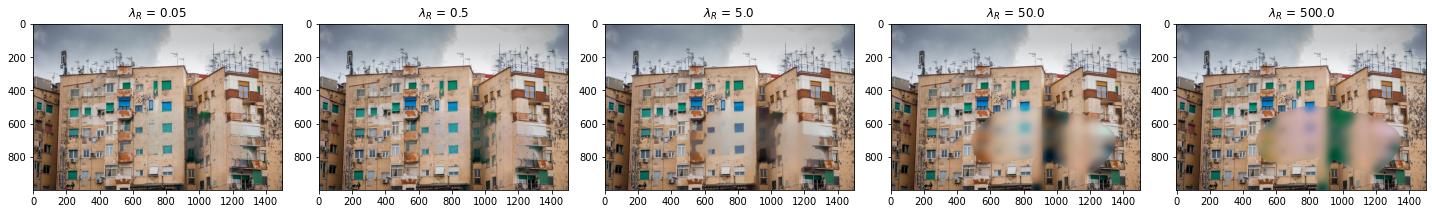

In [28]:
wall_with_mask_R005 = apply_result_to_image('resultat_R005.png', wall_mask, wall_origin)
wall_with_mask_R05 = apply_result_to_image('resultat_R05.png', wall_mask, wall_origin)
wall_with_mask_R5 = apply_result_to_image('resultat_R5.png', wall_mask, wall_origin)
wall_with_mask_R50 = apply_result_to_image('resultat_R50.png', wall_mask, wall_origin)
wall_with_mask_R500 = apply_result_to_image('resultat_R500.png', wall_mask, wall_origin)

wall_with_mask_R_list = [wall_with_mask_R005, wall_with_mask_R05, wall_with_mask_R5, wall_with_mask_R50, wall_with_mask_R500]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(wall_with_mask_R_list[i])
    axes[i].set_title(fr'$\lambda_R$ = {0.05*10**i}')
plt.tight_layout()

## Variation of $\lambda_{LS}$

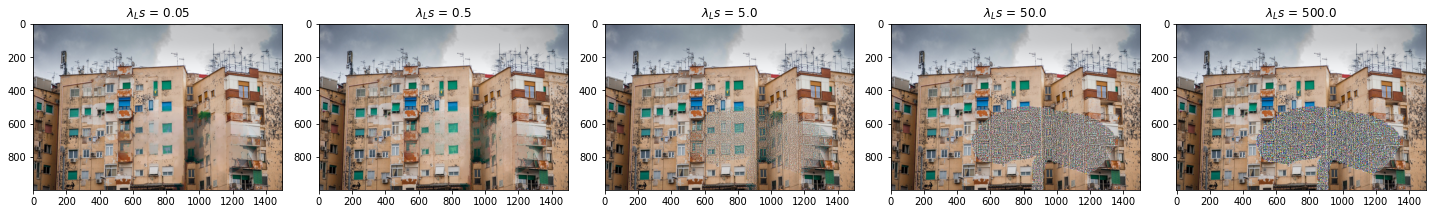

In [32]:
wall_with_mask_LS005 = apply_result_to_image('resultat_LS005.png', wall_mask, wall_origin)
wall_with_mask_LS05 = apply_result_to_image('resultat_LS05.png', wall_mask, wall_origin)
wall_with_mask_LS5 = apply_result_to_image('resultat_LS5.png', wall_mask, wall_origin)
wall_with_mask_LS50 = apply_result_to_image('resultat_LS50.png', wall_mask, wall_origin)
wall_with_mask_LS500 = apply_result_to_image('resultat_LS500.png', wall_mask, wall_origin)

wall_with_mask_LS_list = [wall_with_mask_LS005, wall_with_mask_LS05, wall_with_mask_LS5, wall_with_mask_LS50, wall_with_mask_LS500]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(wall_with_mask_LS_list[i])
    axes[i].set_title(fr'$\lambda_Ls$ = {0.05*10**i}')
plt.tight_layout()

## Variation of $\lambda_S$

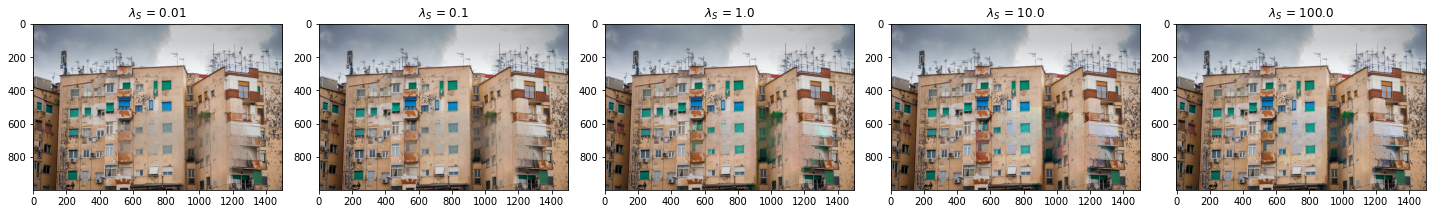

In [33]:
wall_with_mask_S001 = apply_result_to_image('resultat_S001.png', wall_mask, wall_origin)
wall_with_mask_S01 = apply_result_to_image('resultat_S01.png', wall_mask, wall_origin)
wall_with_mask_S1 = apply_result_to_image('resultat_S1.png', wall_mask, wall_origin)
wall_with_mask_S10 = apply_result_to_image('resultat_S10.png', wall_mask, wall_origin)
wall_with_mask_S100 = apply_result_to_image('resultat_S100.png', wall_mask, wall_origin)

wall_with_mask_S_list = [wall_with_mask_S001, wall_with_mask_S01, wall_with_mask_S1, wall_with_mask_S10, wall_with_mask_S100]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(wall_with_mask_S_list[i])
    axes[i].set_title(fr'$\lambda_S$ = {0.01*10**i}')
plt.tight_layout()

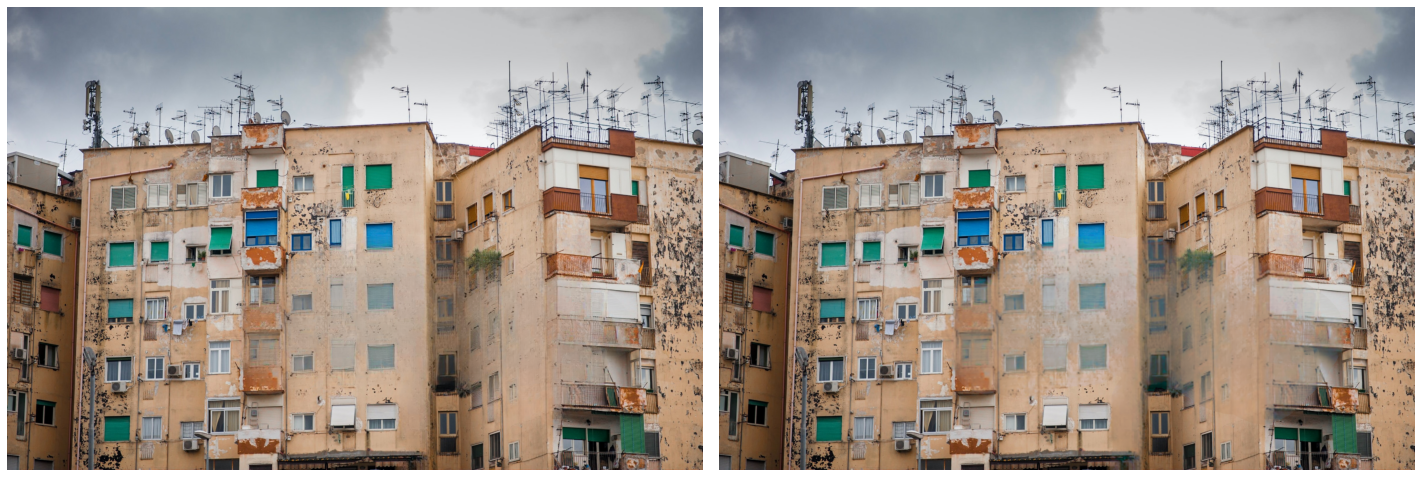

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].axis('off')
ax[0].imshow(wall_inpainted)
ax[1].axis('off')
ax[1].imshow(wall_def)
plt.tight_layout()

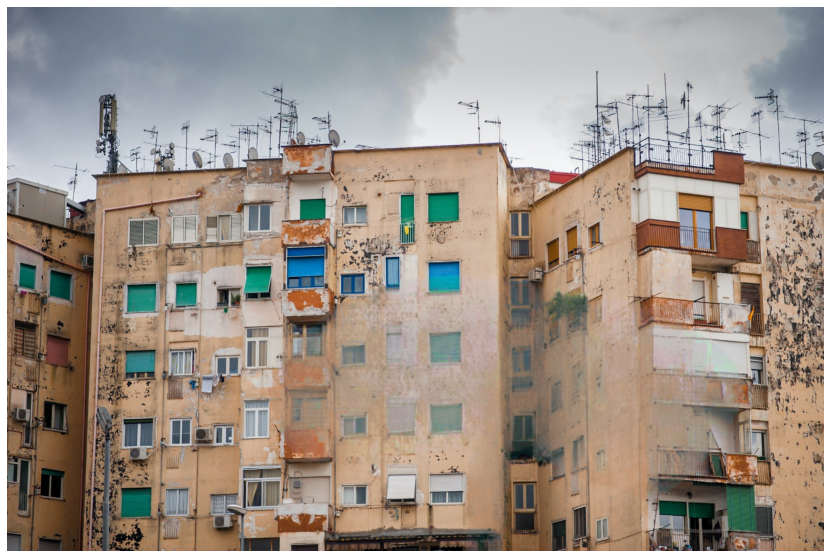

In [73]:
wall_def = apply_result_to_image('resultat_def_mask.png', wall_mask, wall_origin)

plt.figure(figsize=(20, 10))

plt.axis('off')
plt.imshow(wall_def)

---

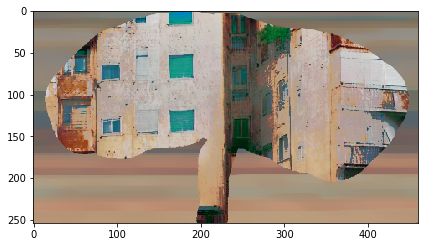

In [11]:
res=imread('resultat_L001.png')
imshow(res)

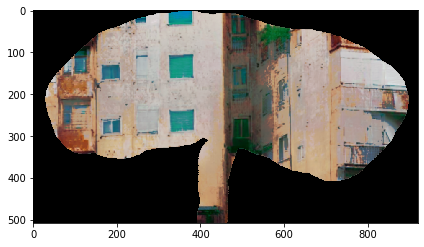

In [12]:
# UPSAMPLE

res_mask = resize(res, mask_extraced.shape) * (mask_extraced//255)
imshow(res_mask)

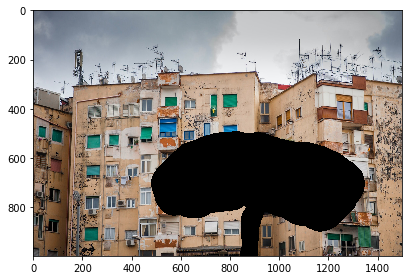

In [13]:
wall_with_mask = (wall_origin * (1-wall_mask//255))
imshow(wall_with_mask)

In [14]:
wall_with_mask[490:,450:1370,:] += (res_mask*255).astype(np.uint8)

Text(0.5, 1.0, 'Wall with recoloration')

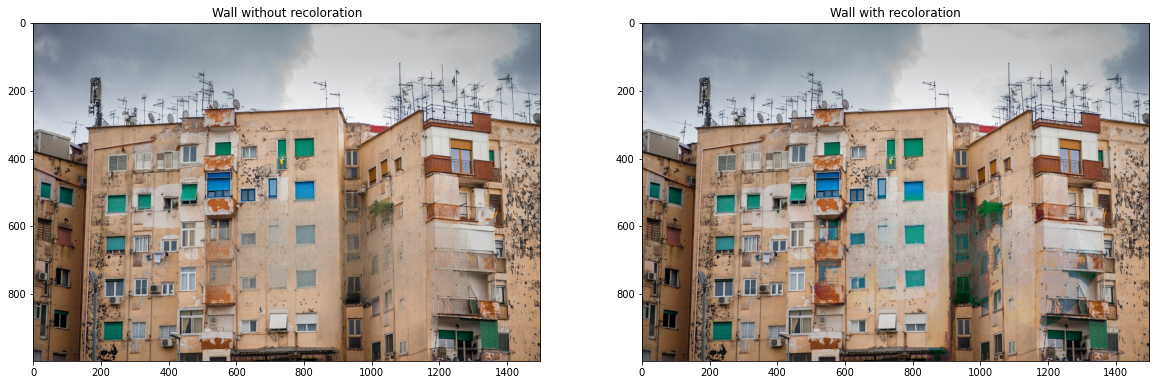

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(wall_inpainted)
ax[0].set_title('Wall without recoloration')
ax[1].imshow(wall_with_mask)
ax[1].set_title('Wall with recoloration')

In [17]:
imsave(base_dir + 'wall_after_recoloration_lmbS20_lmbR5.png', wall_with_mask)
imsave(base_dir + 'wall_before_recoloration.png', wall_inpainted)

## Image with no mask

Instead of using the masked image with the average color around, we use the croped image around the masked region

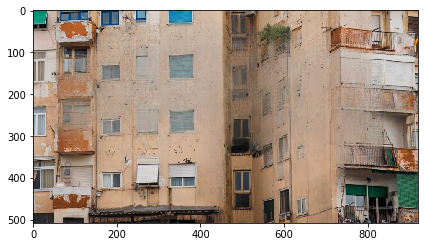

In [18]:
torecolor = wall_inpainted[490:,450:1370,:]
imshow(torecolor)
imsave(base_dir + 'wall_torecolor_not_masked.png', torecolor)

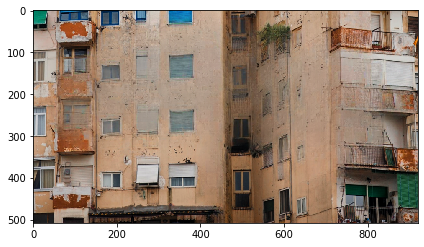

In [19]:
# torecolor_contrast = exposure.adjust_gamma(torecolor, 1.2)
# imshow(torecolor_contrast)
# imsave(base_dir + 'wall_torecolor_not_masked.png', torecolor_contrast)

Shape : (254, 460, 3)


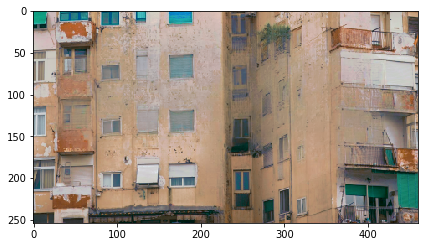

In [20]:
res = imread('resultat.png')
imshow(res)
print(f'Shape : {res.shape}')

Shape : (508, 920, 3)


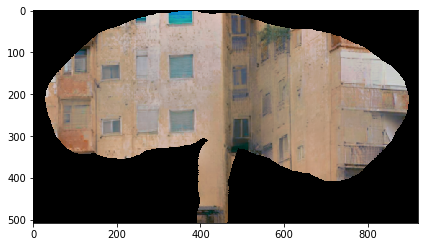

In [21]:
res_resize = (resize(res, torecolor.shape) * (mask_extraced//255) * 255).astype(np.uint8)
imshow(res_resize)
print(f'Shape : {res_resize.shape}')

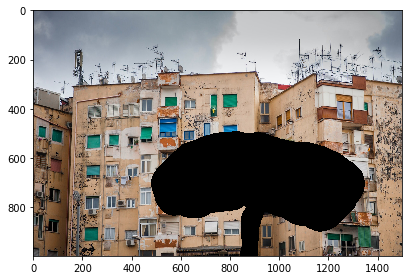

In [22]:
wall_with_mask = (wall_origin * (1-wall_mask//255))
imshow(wall_with_mask)

Text(0.5, 1.0, 'Wall with recoloration')

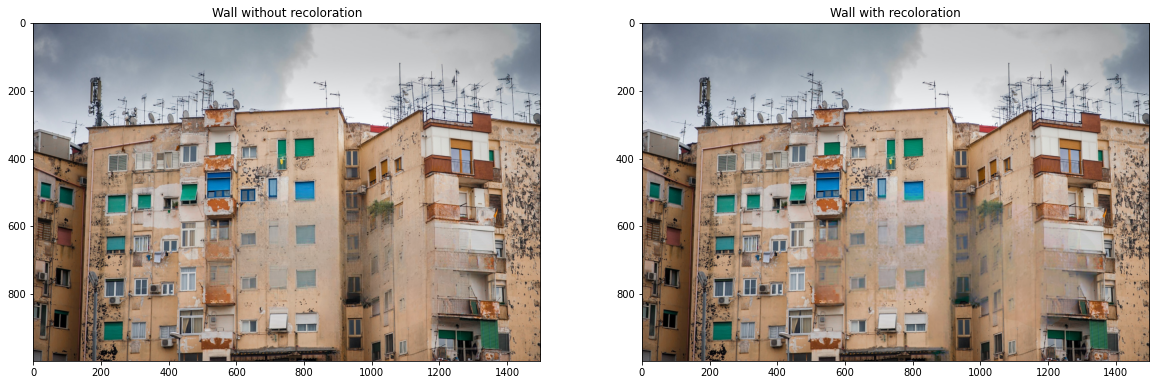

In [23]:
wall_with_mask[490:,450:1370,:] += res_resize
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(wall_inpainted)
ax[0].set_title('Wall without recoloration')
ax[1].imshow(wall_with_mask)
ax[1].set_title('Wall with recoloration')

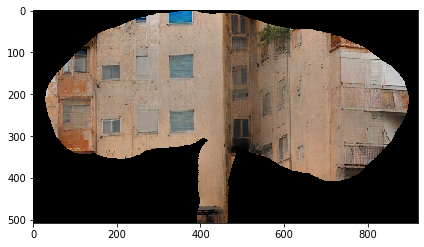

In [24]:
torecolor_contrast_masked = torecolor_contrast * (mask_extraced//255)
imshow(torecolor_contrast_masked)

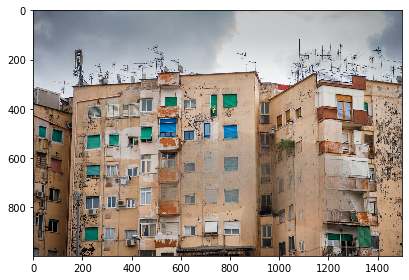

In [25]:
wall_with_mask = (wall_origin * (1-wall_mask//255))
wall_with_mask[490:,450:1370,:] += torecolor_contrast_masked
imshow(wall_with_mask)